# Segmentación de clientes

La segmentación de clientes es el proceso que permite a las empresas dividir a sus consumidores en categorías específicas, basadas en características que se extraen de su comportamiento como clientes y la información que pueden obtener de sus interacciones con la empresa.

Para este proyecto de <b>segmentación de clientes</b>, se usará un algoritmo de aprendizaje no supervisado, <b>k-means</b>; el cual, es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones (clientes en este caso) en k grupos en el que cada observación o cliente pertenece a un grupo característico. 

La base de datos que se usará para la elaboración de este cuaderno fue tomado de Kaggle. En esta dice que: 
_Este conjunto de datos se crea únicamente con fines de aprendizaje de los conceptos de segmentación de clientes, también conocido como análisis de la cesta de la compra._
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# Importamos las librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
#import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")


## EDA

In [2]:
#Dimensiones del conjunto de datos
data = pd.read_csv("https://github.com/PabloJRW/clustering-clientes/raw/main/Mall_Customers.csv")
print('Dimensiones del df:', data.shape)

Dimensiones del df: (200, 5)


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Para esta tarea contamos con un conjunto de datos de 5 variables.
<li> <b>CustomerID:</b> identificador único de los clientes.
<li> <b>Gender:</b> género de los clientes. (Male, Female)
<li> <b>Age:</b> edad de los clientes.
<li> <b>Annual Income:</b> ingreso de los clientes por año.
<li> <b>Spending Score (1-100):</b> puntuación de compra. 

K-Means encuentra clústers basándose en la distancia, por lo que es importante que no tengamos variables categóricas. También, no tomaremos en cuenta la variable <b>"CustomerID"</b>, debido que sólo es un identificador que no nos aportará información. Nos quedamos con 3 variables.

In [4]:
data.drop(["CustomerID","Gender"], axis=1, inplace=True)

Veamos gráficamente nuestros datos para observar su dispersión.

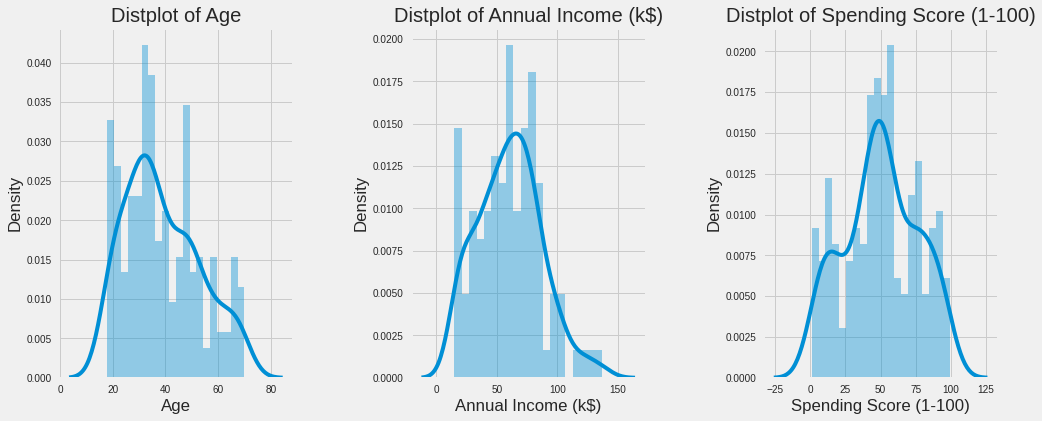

In [5]:
# Distribución de nuestras 3 variables
# =========================================================================
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))


## Modelo (K-means)

El siguiente paso será normalizar las variables para que todas estén en una misma escala y no afecte el cálculo de la distancia entre puntos:

In [6]:
# Normalizamos nuestras variables
# ======================================================================
X = data.copy()
X1 = preprocessing.normalize(X)

### Elegir K (número de conglomerados)

Veamos cuántos segmentos puede encontrar el algoritmo en nuestro conjunto de datos. Para ello, utilizaremos el método de codo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir.

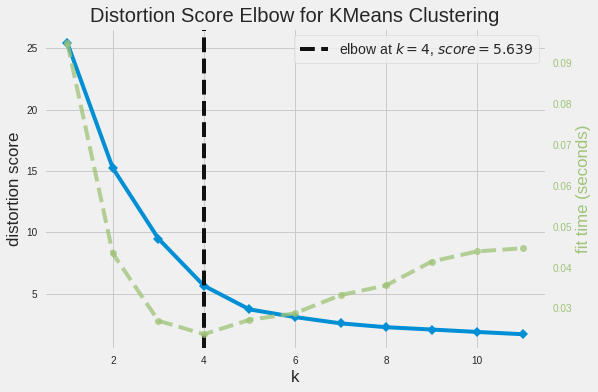

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X1)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

Mediante el método de codo, para nuestro caso, podríamos determinar que entre nuestros datos existen entre 4 y 6 segmentos de clientes. Este es un punto donde entra el criterio experto para tomar la decisión de cual escoger. El método de codo sugiere 4 clusters.

## Entrenamiento del modelo

### 4 Segmentos

In [8]:
kmedia_4k = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_4k.fit(X1)
labels = kmedia_4k.labels_   # Etiqueta de cluters
centroides = kmedia_4k.cluster_centers_   # Centroides de clusters

data['label'] =  labels

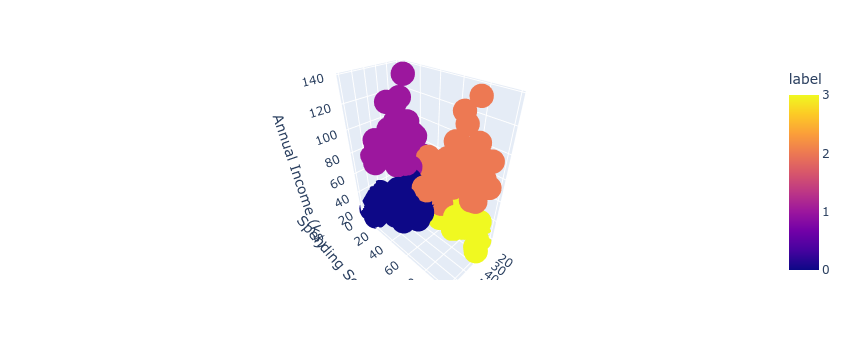

In [18]:
# Plot con 4 segmentos de clientes
fig = px.scatter_3d(data, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',color='label')
#fig.write_html("/work/clustering-clientes/file4k.html")
fig.write_image("static_4k.png")
fig.show()

Aunque el método de codo nos sugiere 4 segmentos, podemos observar en nuestro gráfico, 5 ó 6 segmentos bastante definidos. Grafiquemos 5 segmentos.

### 5 Segmentos

In [ ]:
kmedia_5k = KMeans(n_clusters = 5
 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_5k.fit(X1)
labels = kmedia_5k.labels_   # Etiqueta de cluters
centroides = kmedia_5k.cluster_centers_   # Centroides de clusters

data['label'] =  labels

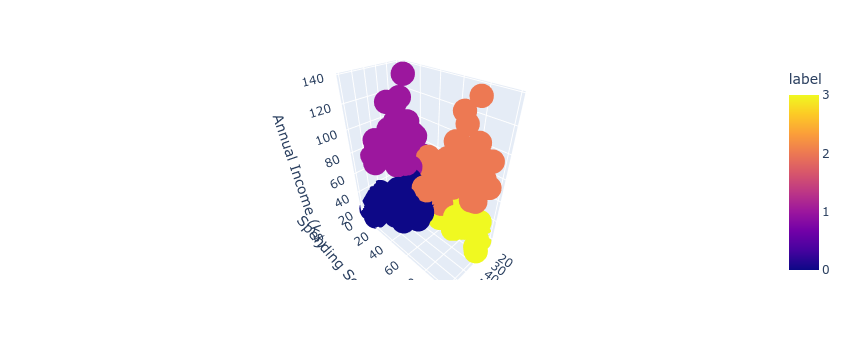

In [16]:
fig = px.scatter_3d(data, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',color='label')
fig.show()
fig.write_html("file5k.html")

# Conclusión

Como se menciona anteriormente, la cantidad de segmentos o clusters k es definido mediante criterio experto, el cual podría depender del problema al cual se busca hallar una solución. O bien, podríamos utilizar el método de codo para casos en el cual no tengamos una tarea definida o estemos desarrollando minería de datos.
 